<a href="https://colab.research.google.com/github/erenuluer/ai_ml_samples/blob/main/fmnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step - accuracy: 0.6784 - loss: 0.8922 - val_accuracy: 0.8495 - val_loss: 0.4321
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 116ms/step - accuracy: 0.8662 - loss: 0.3725 - val_accuracy: 0.8753 - val_loss: 0.3468
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 121ms/step - accuracy: 0.8809 - loss: 0.3227 - val_accuracy: 0.8850 - val_loss: 0.3236
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step - accuracy: 0.8950 - loss: 0.2886 - val_accuracy: 0.8895 - val_loss: 0.3045
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.9033 - loss: 0.2644 - val_accuracy: 0.8850 - val_loss: 0.3117
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


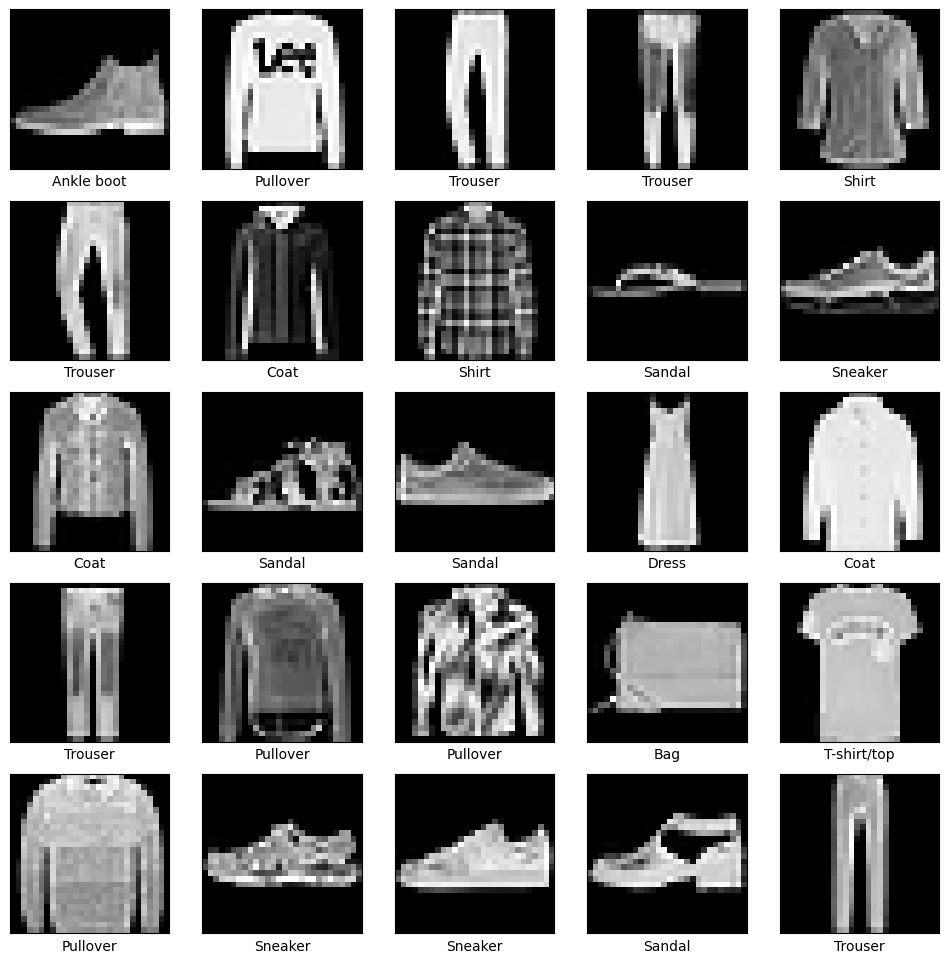

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models

# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize and reshape images
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

# Make predictions
predictions = model.predict(test_images)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 25 images with predictions
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.xlabel(class_names[predicted_labels[i]])

plt.show()
